In [1]:
import os
import bye_cycle
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import pickle
import matplotlib.pyplot as plt
from beep.structure.cli import auto_load_processed

2022-08-08 21:17:07.148517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-08 21:17:07.334742: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-08-08 21:17:08.047700: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib:/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/opt/amazon/efa/lib64:/opt/amazon/openmpi/lib64:/usr/local/lib:/usr/lib:/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:/us

In [2]:
# Disabling tf warnings
tf.get_logger().setLevel('INFO')
# Disabling GPU
RUN_ON_GPU = False
if not RUN_ON_GPU:
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
structure_path = '/home/ec2-user/SageMaker/Amalie/competition/structured/'
# structure_path = '/home/ec2-user/SageMaker/data_cache/structure'

#Get all structured files with the correct prefix
names = [os.path.join(structure_path, n) for n in os.listdir(structure_path) if "FastCharge" in n]
#exclude stitched files
# excuded_cells = [str(_) for _ in list(range(292,295)) + list(range(297,307))]
# names = [n for n in names if (not "p2_structure" in n and ".gz" in n and not any(x in n for x in excuded_cells))]
N = len(names)

In [6]:
cell = auto_load_processed(names[90])

In [21]:
healthy_clean_stuctured_data['test_time'].shape

(957,)

In [20]:
f(healthy_clean_stuctured_data['test_time']).shape

(957,)

In [28]:
f(clean_stuctured_data['test_time'])

ValueError: A value in x_new is above the interpolation range.

Text(0.5, 1.0, 'Number of Charge-Discharge Cycles:       1')

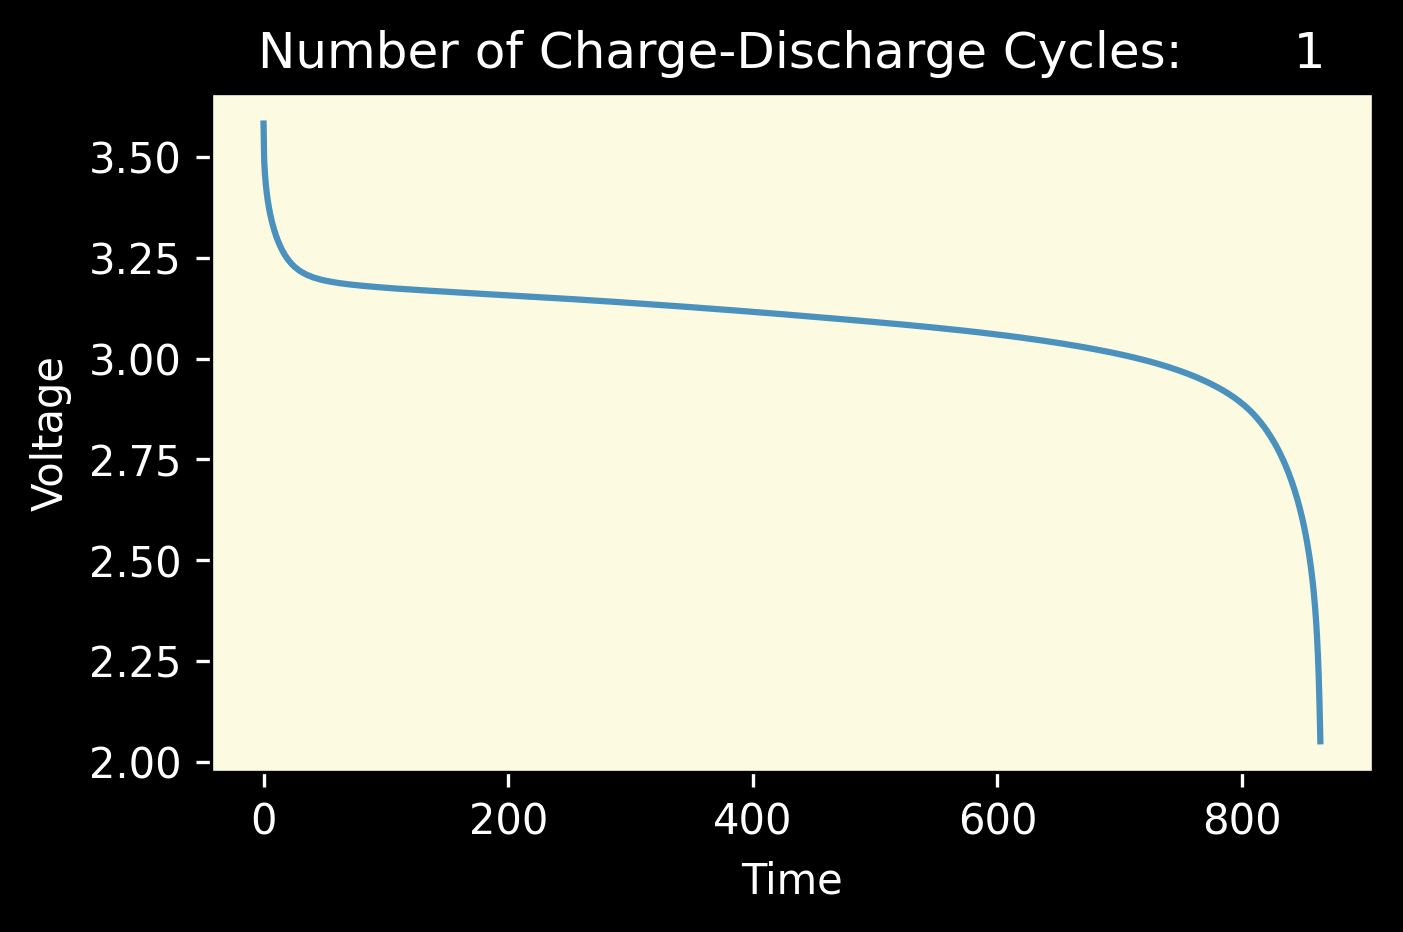

In [62]:
plt.rcParams['axes.facecolor']='#fcfbe1'
plt.figure(dpi=300, facecolor='k', figsize=[5,3])
plt.plot(healthy_clean_stuctured_data['test_time'], healthy_clean_stuctured_data['voltage'],
               label='Healthy Battery', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Voltage') 
i= 1
plt.title(f'Number of Charge-Discharge Cycles: \t {i}'.expandtabs())
# plt.set_facecolor('#fcfbe1')

In [79]:
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib as mpl
from tqdm import tqdm
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
max_cycle = max(cell.structured_summary['cycle_index'])


for i in tqdm(range(1, max_cycle)):
#     print(max_cycle)
#     i = 800
    healthy_clean_stuctured_data = bye_cycle.clean_cycle_data(cell,cycle_number=1,
                                                          columns = ['voltage', 'current', 'cycle_index',
                                                                     'discharge_capacity', 'charge_capacity',
                                                                     'step_type', 'test_time'],
                                                          exclude_step_type='charge')
    healthy_clean_stuctured_data = healthy_clean_stuctured_data.sort_values(by=['test_time'], ascending=True)
    healthy_clean_stuctured_data['test_time'] = healthy_clean_stuctured_data['test_time'] - healthy_clean_stuctured_data['test_time'].iloc[0]
    healthy_clean_stuctured_data = healthy_clean_stuctured_data[healthy_clean_stuctured_data['voltage'] > 2.05]
    # ax  = plt.figure(dpi=300, facecolor='k', figsize=[4,3])
    fig, ax  = plt.subplots(1,2,dpi=300, facecolor='k', figsize=[12,3])
    ax[1].plot(healthy_clean_stuctured_data['test_time'], healthy_clean_stuctured_data['voltage'],
               label='Healthy Battery', alpha=0.8, linewidth=2)
#     i=800
    clean_stuctured_data = bye_cycle.clean_cycle_data(cell,cycle_number=i,
                                                          columns = ['voltage', 'current', 'cycle_index',
                                                                     'discharge_capacity', 'charge_capacity',
                                                                     'step_type', 'test_time'],
                                                          exclude_step_type='charge')
    clean_stuctured_data = clean_stuctured_data.sort_values(by=['test_time'], ascending=True)
    clean_stuctured_data['test_time'] = clean_stuctured_data['test_time'] - clean_stuctured_data['test_time'].iloc[0]
    clean_stuctured_data = clean_stuctured_data[clean_stuctured_data['voltage'] > 2.05]
    # ax  = plt.figure(dpi=300, facecolor='white', figsize=[4,3])
    ax[1].plot(clean_stuctured_data['test_time'], clean_stuctured_data['voltage'], color='C2',
               label='Degrading Battery', alpha=1, zorder=-1, linewidth=2)
    

    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Voltage')
#     from scipy import interpolate
#     f = interpolate.interp1d(clean_stuctured_data['test_time'],
#                              clean_stuctured_data['voltage'], kind='cubic', bounds_error=False)
#     ax[1].fill_between(healthy_clean_stuctured_data['test_time'],f(healthy_clean_stuctured_data['test_time']), 
#                        healthy_clean_stuctured_data['voltage'], alpha = 0.2, hatch="X", interpolate=True)
    ax[1].fill_between(healthy_clean_stuctured_data['test_time'], healthy_clean_stuctured_data['voltage'],
                       alpha=0.4, facecolor='#FF9999')
    ax[1].fill_between(clean_stuctured_data['test_time'], clean_stuctured_data['voltage'], 
                       alpha=1, facecolor='#fcfbe1')


    ax[1].set_ylim([2.0, 3.7])
    ax[1].set_xlim([-50, 950])
    ax[1].set_facecolor('#fcfbe1')

    ax[1].legend(labelcolor='k')



    ax[0].set_xlabel('Cycle')
    ax[0].scatter(cell.structured_summary['cycle_index'][1:i+1], cell.structured_summary['discharge_capacity'][1:i+1], s=0.2)
    ax[0].set_ylabel('Discharge capacity (Ah/Wh)')
    ax[0].set_ylim([0.85, 1.2])
    ax[0].set_xlim([-50, 1100])
    ax[0].set_facecolor('#fcfbe1')
    linear_limit = 750
    if i > linear_limit:
        ax[0].axvline(x = linear_limit, color = 'C3', linestyle='--')
    fig.suptitle(f'Number of Charge-Discharge Cycles: \t {i}'.expandtabs())
#     break
    plt.savefig(f'media/degredation_visual/voltage_evolution_{i:04d}.png', dpi=400, transparent=False, bbox_inches="tight")
    plt.close()
#     break

    
# # Make a user-defined colormap.
# cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",['C0','C1'])

# # Make a normalizer that will map the time values from
# # [start_time,end_time+1] -> [0,1].
# tim = range(linear_limit,max_cycle+1)
# cnorm = mcol.Normalize(vmin=min(tim),vmax=max(tim))


# # Turn these into an object that can be used to map time values to colors and
# # can be passed to plt.colorbar().
# cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)




# clean_stuctured_data = bye_cycle.clean_cycle_data(cell,cycle_number=max_cycle-1,
#                                                       columns = ['voltage', 'current', 'cycle_index',
#                                                                  'discharge_capacity', 'charge_capacity',
#                                                                  'step_type', 'test_time'],
#                                                       exclude_step_type='charge')
# clean_stuctured_data = clean_stuctured_data.sort_values(by=['test_time'], ascending=True)
# clean_stuctured_data['test_time'] = clean_stuctured_data['test_time'] - clean_stuctured_data['test_time'].iloc[0]
# clean_stuctured_data = clean_stuctured_data[clean_stuctured_data['voltage'] > 2.05]
# # ax  = plt.figure(dpi=300, facecolor='white', figsize=[4,3])
# plt.plot(clean_stuctured_data['test_time'], clean_stuctured_data['voltage'], color='C2')

100%|██████████| 1027/1027 [14:34<00:00,  1.17it/s]


In [81]:
os.system(f"ffmpeg -framerate 30 -i media/degredation_visual/voltage_evolution_%04d.png -c:v h264 -crf 14 -c:v libx264 -movflags +faststart -maxrate 50M -tune animation -bufsize 1MB -y media/degredation_visual/voltage_evolution_30.avi")
# os.system(f'ffmpeg -i media/degredation_visual/voltage_evolution.mp4 -framerate 24 -vf "fps=24, scale=1000:-1:flags=lanczos" -loop 0 -y media/degredation_visual/voltage_evolution.gif')

ffmpeg version 5.0.1-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      57. 17.100 / 57. 17.100
  libavcodec     59. 18.100 / 59. 18.100
  libavformat   

0

966


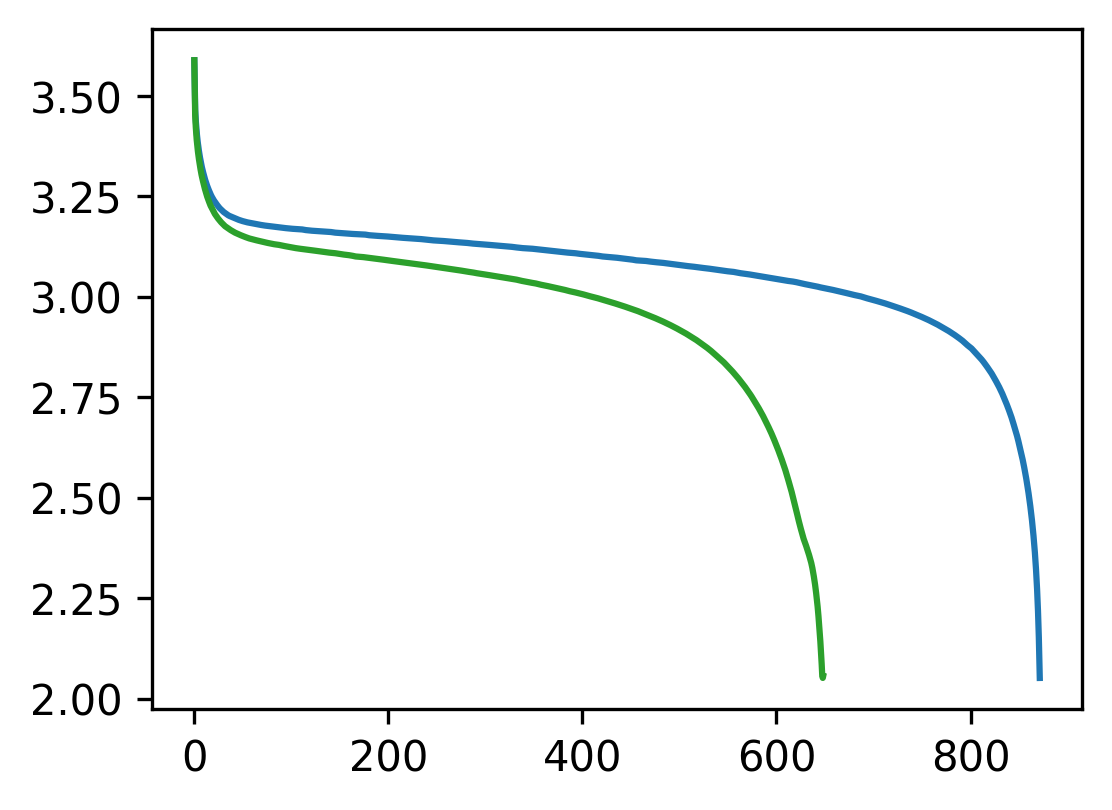

In [35]:
max_cycle = max(cell.structured_summary['cycle_index'])
print(max_cycle)
clean_stuctured_data = bye_cycle.clean_cycle_data(cell,cycle_number=1,
                                                      columns = ['voltage', 'current', 'cycle_index',
                                                                 'discharge_capacity', 'charge_capacity',
                                                                 'step_type', 'test_time'],
                                                      exclude_step_type='charge')
clean_stuctured_data = clean_stuctured_data.sort_values(by=['test_time'], ascending=True)
clean_stuctured_data['test_time'] = clean_stuctured_data['test_time'] - clean_stuctured_data['test_time'].iloc[0]
clean_stuctured_data = clean_stuctured_data[clean_stuctured_data['voltage'] > 2.05]
ax  = plt.figure(dpi=300, facecolor='white', figsize=[4,3])
plt.plot(clean_stuctured_data['test_time'], clean_stuctured_data['voltage'])

clean_stuctured_data = bye_cycle.clean_cycle_data(cell,cycle_number=max_cycle-1,
                                                      columns = ['voltage', 'current', 'cycle_index',
                                                                 'discharge_capacity', 'charge_capacity',
                                                                 'step_type', 'test_time'],
                                                      exclude_step_type='charge')
clean_stuctured_data = clean_stuctured_data.sort_values(by=['test_time'], ascending=True)
clean_stuctured_data['test_time'] = clean_stuctured_data['test_time'] - clean_stuctured_data['test_time'].iloc[0]
clean_stuctured_data = clean_stuctured_data[clean_stuctured_data['voltage'] > 2.05]
# ax  = plt.figure(dpi=300, facecolor='white', figsize=[4,3])
plt.plot(clean_stuctured_data['test_time'], clean_stuctured_data['voltage'], color='C2')

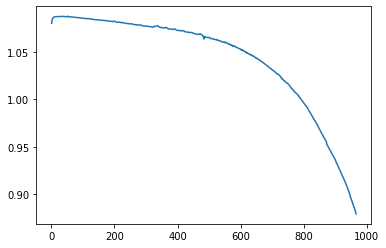

In [84]:
max_cycle = max(cell.structured_summary['cycle_index'])
cycle_number = 200
for i in range(1, max_cycle):
    clean_stuctured_data = bye_cycle.clean_cycle_data(cell,cycle_number=i,
                                                      columns = ['voltage', 'current', 'cycle_index',
                                                                 'discharge_capacity', 'charge_capacity',
                                                                 'step_type', 'test_time'],
                                                      exclude_step_type='charge')
    clean_stuctured_data = clean_stuctured_data.sort_values(by=['test_time'], ascending=True)
    clean_stuctured_data['test_time'] = clean_stuctured_data['test_time'] - clean_stuctured_data['test_time'].iloc[0]
    clean_stuctured_data = clean_stuctured_data[clean_stuctured_data['voltage'] > 2.05]
    ax  = plt.figure(dpi=300, facecolor='white', figsize=[4,3])
    plt.plot(clean_stuctured_data['test_time'], clean_stuctured_data['voltage'])
    if i == 1:
        ymin, ymax = plt.ylim()
        xmin, xmax = plt.xlim()
    if i > 1:
        plt.xlim([xmin, xmax])
        plt.ylim([ymin, ymax])
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.title(f'Cycle number:\t {i}'.expandtabs())
    # plt.plot(clean_stuctured_data['test_time'], clean_stuctured_data['charge_capacity'])
    plt.savefig(f'media/degredation_visual/voltage_evolution_{i:04d}.png', dpi=400, transparent=False, bbox_inches="tight")
    plt.close()
    
os.system(f"ffmpeg -framerate 10 -i media/degredation_visual/voltage_evolution_%04d.png -c:v h264 -crf 14 -c:v libx264 -movflags +faststart -vf format=yuv420p -maxrate 50M -tune animation -bufsize 1MB -y media/degredation_visual/voltage_evolution.mp4")
os.system(f'ffmpeg -i media/degredation_visual/voltage_evolution.mp4 -framerate 20 -vf "fps=24, scale=2000:-1:flags=lanczos" -loop 0 -y media/degredation_visual/voltage_evolution.gif')

ffmpeg version 5.0.1-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      57. 17.100 / 57. 17.100
  libavcodec     59. 18.100 / 59. 18.100
  libavformat   

0

In [80]:
os.system(f"ffmpeg -framerate 10 -i media/degredation_visual/voltage_evolution_%04d.png -c:v h264 -crf 14 -c:v libx264 -movflags +faststart -vf format=yuv420p -maxrate 50M -tune animation -bufsize 1MB -y media/degredation_visual/voltage_evolution.mp4")


ffmpeg version 5.0.1-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      57. 17.100 / 57. 17.100
  libavcodec     59. 18.100 / 59. 18.100
  libavformat   

0

In [78]:
os.system(f'ffmpeg -i media/degredation_visual/voltage_evolution.mp4 -framerate 10 -vf "fps=24, scale=2000:-1:flags=lanczos" -loop 0 -y media/degredation_visual/voltage_evolution.gif')

ffmpeg version 5.0.1-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      57. 17.100 / 57. 17.100
  libavcodec     59. 18.100 / 59. 18.100
  libavformat   

0

In [73]:
clean_stuctured_data

,voltage,current,cycle_index,discharge_capacity,charge_capacity,step_type,test_time
9989,3.583984,-0.638834,9,0.000006,1.076294,discharge,0.000000
9988,3.582382,-0.712681,9,0.000006,1.076294,discharge,0.009841
9987,3.580781,-0.786528,9,0.000006,1.076294,discharge,0.019682
9986,3.579179,-0.860374,9,0.000006,1.076294,discharge,0.029523
9985,3.577578,-0.934221,9,0.000006,1.076294,discharge,0.039364
...,...,...,...,...,...,...,...
9004,2.006406,-2.716877,9,1.066117,1.076294,discharge,918.442229
9003,2.004805,-2.111499,9,1.067951,1.076294,discharge,936.329684
9002,2.003203,-1.506121,9,1.069785,1.076294,discharge,954.217139
9000,2.000000,-0.532424,9,1.072153,1.076294,discharge,964.091286
